In [1]:
# importing all the required libraries

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
df=pd.read_csv('preprocessed_data.csv')

In [3]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,0,0,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,1,0
1,1,1,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,2,0
2,2,2,78.0,100.0,35.78,42.5,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,3,0
3,3,3,73.0,100.0,35.78,74.0,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,4,0
4,4,4,70.0,100.0,35.78,74.0,14.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1552210 non-null  int64  
 1   Hour         1552210 non-null  int64  
 2   HR           1552068 non-null  float64
 3   O2Sat        1551836 non-null  float64
 4   Temp         1544780 non-null  float64
 5   MAP          1549512 non-null  float64
 6   Resp         1550211 non-null  float64
 7   BUN          1502018 non-null  float64
 8   Chloride     855185 non-null   float64
 9   Creatinine   1501368 non-null  float64
 10  Glucose      1510164 non-null  float64
 11  Hct          1493436 non-null  float64
 12  Hgb          1490691 non-null  float64
 13  WBC          1486591 non-null  float64
 14  Platelets    1487784 non-null  float64
 15  Age          1552210 non-null  float64
 16  Gender       1552210 non-null  int64  
 17  HospAdmTime  1552202 non-null  float64
 18  IC

In [5]:
df.isnull().sum()

Unnamed: 0          0
Hour                0
HR                142
O2Sat             374
Temp             7430
MAP              2698
Resp             1999
BUN             50192
Chloride       697025
Creatinine      50842
Glucose         42046
Hct             58774
Hgb             61519
WBC             65619
Platelets       64426
Age                 0
Gender              0
HospAdmTime         8
ICULOS              0
SepsisLabel         0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN',
       'Chloride', 'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [9]:
# Fill missing values with mean for numerical columns
num_cols = ['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride', 'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [10]:
df.isnull().sum()

Hour           0
HR             0
O2Sat          0
Temp           0
MAP            0
Resp           0
BUN            0
Chloride       0
Creatinine     0
Glucose        0
Hct            0
Hgb            0
WBC            0
Platelets      0
Age            0
Gender         0
HospAdmTime    8
ICULOS         0
SepsisLabel    0
dtype: int64

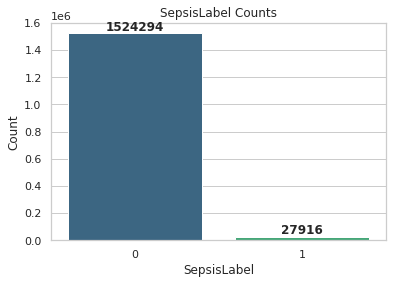

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the values in 'SepsisLabel'
label_counts = df['SepsisLabel'].value_counts()

# Set plot style
sns.set(style="whitegrid")

# Plot barplot for 'SepsisLabel' counts
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='SepsisLabel', palette='viridis')

# Annotate the counts above each bar
for i, count in enumerate(label_counts):
    ax.text(i, count + 5, f'{count}', ha='center', va='bottom', fontweight='bold')

# Add title and labels
plt.title('SepsisLabel Counts')
plt.xlabel('SepsisLabel')
plt.ylabel('Count')

# Display the plot
plt.show()


In [13]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['SepsisLabel'] == 0]
df_minority = df[df['SepsisLabel'] == 1]

# Downsample the majority class to match the size of the minority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,          # sample without replacement
                                   n_samples=len(df_minority),  # match minority class size
                                   random_state=42)        # for reproducibility

# Combine downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the resulting dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Update the original dataframe
df = df_downsampled

# Display the class distribution to verify
print(df['SepsisLabel'].value_counts())


0    27916
1    27916
Name: SepsisLabel, dtype: int64


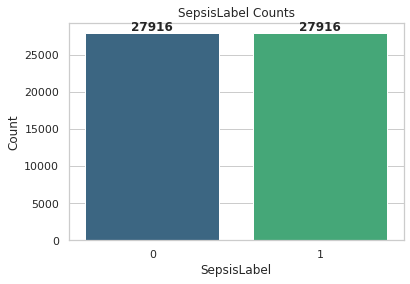

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the values in 'SepsisLabel'
label_counts = df['SepsisLabel'].value_counts()

# Set plot style
sns.set(style="whitegrid")

# Plot barplot for 'SepsisLabel' counts
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='SepsisLabel', palette='viridis')

# Annotate the counts above each bar
for i, count in enumerate(label_counts):
    ax.text(i, count + 5, f'{count}', ha='center', va='bottom', fontweight='bold')

# Add title and labels
plt.title('SepsisLabel Counts')
plt.xlabel('SepsisLabel')
plt.ylabel('Count')

# Display the plot
plt.show()


In [15]:
# Split the dataset into training and testing sets
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [18]:
# Dictionary to store model results
results = {}

# 1. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

# Metrics for Random Forest
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Log Loss': log_loss(y_test, y_pred_rf_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
    'Classification Report': classification_report(y_test, y_pred_rf, output_dict=True)
}

In [19]:
# 2. XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Metrics for XGBoost
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Log Loss': log_loss(y_test, y_pred_xgb_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb),
    'Classification Report': classification_report(y_test, y_pred_xgb, output_dict=True)
}

In [26]:
from sklearn.tree import DecisionTreeClassifier
# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]

# Metrics for Decision Tree
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Log Loss': log_loss(y_test, y_pred_dt_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
    'Classification Report': classification_report(y_test, y_pred_dt, output_dict=True)
}

In [21]:
# 4. Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_proba = lr.predict_proba(X_test)[:, 1]

# Metrics for Logistic Regression
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Log Loss': log_loss(y_test, y_pred_lr_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr),
    'Classification Report': classification_report(y_test, y_pred_lr, output_dict=True)
}

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
# Display results for each model
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Log Loss: {metrics['Log Loss']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(pd.DataFrame(metrics['Classification Report']).transpose())


Model: Random Forest
Accuracy: 0.9413
Log Loss: 0.2488
Confusion Matrix:
[[7578  779]
 [ 204 8189]]
Classification Report:
              precision    recall  f1-score       support
0              0.973786  0.906785  0.939092   8357.000000
1              0.913136  0.975694  0.943379   8393.000000
accuracy       0.941313  0.941313  0.941313      0.941313
macro avg      0.943461  0.941239  0.941235  16750.000000
weighted avg   0.943395  0.941313  0.941240  16750.000000

Model: XGBoost
Accuracy: 0.8704
Log Loss: 0.3391
Confusion Matrix:
[[7173 1184]
 [ 987 7406]]
Classification Report:
              precision    recall  f1-score       support
0              0.879044  0.858322  0.868560   8357.000000
1              0.862165  0.882402  0.872166   8393.000000
accuracy       0.870388  0.870388  0.870388      0.870388
macro avg      0.870605  0.870362  0.870363  16750.000000
weighted avg   0.870587  0.870388  0.870367  16750.000000

Model: Logistic Regression
Accuracy: 0.6807
Log Loss: 0.6068


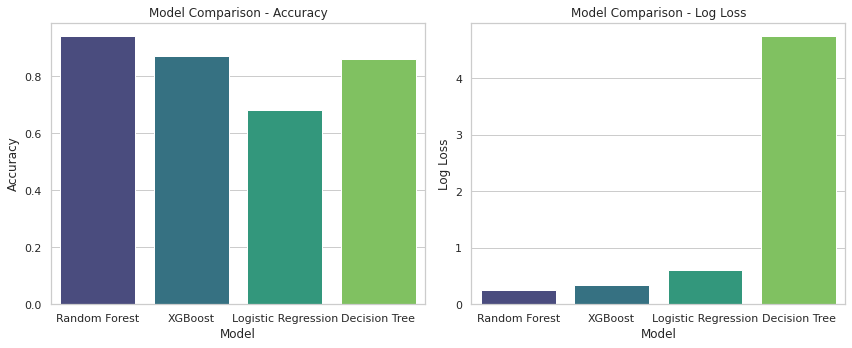

In [28]:
# Plot comparison of Accuracy and Log Loss for each model
models = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in models]
log_losses = [results[model]['Log Loss'] for model in models]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison bar plot
sns.barplot(x=models, y=accuracies, ax=ax[0], palette="viridis")
ax[0].set_title("Model Comparison - Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")

# Log Loss comparison bar plot
sns.barplot(x=models, y=log_losses, ax=ax[1], palette="viridis")
ax[1].set_title("Model Comparison - Log Loss")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Log Loss")

plt.tight_layout()
plt.show()

In [29]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Save the Random Forest model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

# Predict on test data using the loaded model
y_pred_loaded_rf = loaded_rf.predict(X_test)
y_pred_loaded_rf_proba = loaded_rf.predict_proba(X_test)[:, 1]

# Calculate and print accuracy to verify
accuracy_loaded_rf = accuracy_score(y_test, y_pred_loaded_rf)
print(f"Loaded Model Accuracy: {accuracy_loaded_rf:.4f}")


Loaded Model Accuracy: 0.9413
